In [2]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

In [3]:
# Fixed Effects
# Two-Way Fixed Effects
# Absorbing the fixed effect
# Binary control variables
# Within vs. overall R-squared
# Random effects
# Nonlinear regression
# Heteroskedasticity

/var/folders/gf/qd_8fqss2t55m22vdfqdc47m0000gp/T/ipykernel_56405/528216191.py:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.linspace(0, 10, 30), np.log(np.linspace(0, 10, 30)))


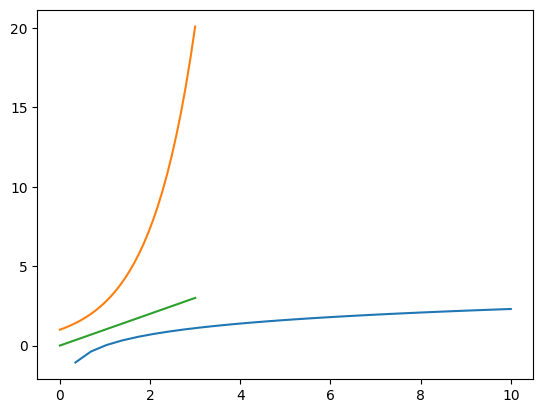

In [243]:
plt.plot(np.linspace(0, 10, 30), np.log(np.linspace(0, 10, 30)))
plt.plot(np.linspace(0, 3, 30), np.exp(np.linspace(0, 3, 30)))
plt.plot(np.linspace(0, 3, 30), np.linspace(0, 3, 30))

## Fixed Effects

In [221]:
num = 10000
np.random.seed(0)
beta_vector = np.array([0, 3, 6])
beta_X = 1.5
X = np.random.normal(0, 1, num)
Group = np.random.randint(0, 3, num)

In [226]:
Y = (pd.get_dummies(Group) * 1).dot(beta_vector) + beta_X * X + np.random.normal(0, 1, num)

In [132]:
((Group == 2) * 1)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [228]:
df = pd.DataFrame({"X": X, "Y": Y, "G0": (Group == 0) * 1, "G1": (Group == 1) * 1, "G2": (Group == 2) * 1})

In [231]:
results = sm.OLS(Y, sm.add_constant(df.drop(columns = ["Y", "G1"]))).fit()
results.params

const    3.038455
X        1.505585
G0      -3.029237
G2       2.966584
dtype: float64

In [136]:
results = sm.OLS(Y, sm.add_constant(df.drop(columns = ["Y", "G1"]))).fit()
results.params

const    3.038455
X        1.505585
G0      -3.029237
G2       2.966584
dtype: float64

In [9]:
num = 10000
np.random.seed(0)
beta_1 = 0
beta_2 = 1
beta_3 = 2
beta = 1.5
Group = np.random.randint(0, 3, num)
X = np.random.normal(0, 1, num)
Y = (Group == 0) * beta_1 + (Group == 1) * beta_2 + (Group == 2) * beta_3 + beta * X + np.random.normal(0, 1, num)
df = pd.DataFrame({"X": X, "Y": Y, "Group": Group, "G0": (Group == 0) * 1, "G1": (Group == 1) * 1, "G2": (Group == 2) * 1})

# Binary control variables

In [10]:
df = pd.DataFrame({"X": X, "Y": Y, "G0": (Group == 0) * 1, "G1": (Group == 1) * 1, "G2": (Group == 2) * 1})
results = sm.OLS(Y, sm.add_constant(df.drop(columns = ["Y"]))).fit()
results.params

const    0.763264
X        1.514395
G0      -0.735467
G1       0.251938
G2       1.246793
dtype: float64

In [11]:
df = pd.DataFrame({"X": X, "Y": Y, "G0": (Group == 0) * 1, "G1": (Group == 1) * 1, "G2": (Group == 2) * 1})
results = sm.OLS(Y, sm.add_constant(df.drop(columns = ["Y"]))).fit()
results.params

const    0.763264
X        1.514395
G0      -0.735467
G1       0.251938
G2       1.246793
dtype: float64

In [12]:
df = pd.DataFrame({"X": X, "Y": Y, "G0": (Group == 0) * 1, "G1": (Group == 1) * 1, "G2": (Group == 2) * 1})
results = sm.OLS(Y, df.drop(columns = ["Y"])).fit()
results.params

X     1.514395
G0    0.027796
G1    1.015201
G2    2.010057
dtype: float64

# Absorbing the fixed effect

In [232]:
dfcopy = df.copy()
dfcopy.X = df.X - df.G0 * df[df.G0 == 1].X.mean() - df.G1 * df[df.G1 == 1].X.mean() - df.G2 * df[df.G2 == 1].X.mean()
dfcopy.Y = df.Y - df.G0 * df[df.G0 == 1].Y.mean() - df.G1 * df[df.G1 == 1].Y.mean() - df.G2 * df[df.G2 == 1].Y.mean()

In [233]:
dfG = pd.DataFrame({"Y": Y, "X": X, "Group": Group})
dfcopy.Y = dfG.Y - dfG.groupby("Group")["Y"].transform("mean")
dfcopy.X = dfG.X - dfG.groupby("Group")["X"].transform("mean")

In [238]:
results = sm.OLS(dfcopy.Y, sm.add_constant(dfcopy.X)).fit()
results.params

const    1.734723e-16
X        1.505585e+00
dtype: float64

In [16]:
dfcopy = df.copy()
dfcopy.X = df.X - df.G0 * df[df["G0"] == 1].X.mean() - df.G1 * df[df["G1"] == 1].X.mean() - df.G2 * df[df["G2"] == 1].X.mean()
dfcopy.Y = df.Y - df.G0 * df[df["G0"] == 1].Y.mean() - df.G1 * df[df["G1"] == 1].Y.mean() - df.G2 * df[df["G2"] == 1].Y.mean()
results = sm.OLS(dfcopy.Y, dfcopy[["X"]]).fit()
results.params

X    1.514395
dtype: float64

In [17]:
df = pd.DataFrame({"X": X, "Y": Y, "Group": Group})
dfcopy = df.copy()

dfcopy.X = dfcopy.X - dfcopy.groupby('Group')['X'].transform('mean')
dfcopy.Y = dfcopy.Y - dfcopy.groupby('Group')['Y'].transform('mean')
results = sm.OLS(dfcopy.Y, dfcopy[["X"]]).fit()
results.params

X    1.514395
dtype: float64

In [240]:
pd.DataFrame({"Group": [1, 2, 1, 2, 1, 2], "X": [1, 2, 3, 4, 5, 6]}).groupby("Group").transform("mean")

,X
0,3.0
1,4.0
2,3.0
3,4.0
4,3.0
5,4.0


# Nonlinear regression

In [244]:
def param_function(x, a, b, c):
    return c + np.log(np.maximum(a + x * b, 0.001))

a_true = 1
b_true = 1.5
c_true = 2

X = np.random.normal(0, 1, num)
Y = np.array([param_function(x, a_true, b_true, c_true) + np.random.normal(0, 1) for x in X])
#Y = np.vectorize(lambda x: param_function(x, a_true, b_true))(X) + np.random.normal(0, 1, num)
params_opt, params_cov = curve_fit(param_function, X, Y, p0 = [1, 1, 1])
params_opt, params_cov

(array([1.00676997, 1.51060235, 1.99608287]),
 array([[ 0.0005206 ,  0.00078217, -0.00038181],
        [ 0.00078217,  0.00117623, -0.00057287],
        [-0.00038181, -0.00057287,  0.00037925]]))

In [245]:
num = 100000
def model_func(x, a, b, c):
    return a + np.exp(b * x + c)

a_true, b_true, c_true = 1, 2, 3

X = np.maximum(np.random.normal(2, 1, num), 0)
Y = np.vectorize(lambda x: model_func(x, a_true, b_true, c_true))(X) + np.random.normal(0, 1, num)

In [246]:
params_opt, params_cov = curve_fit(model_func, X, Y, p0 = [1, 1, 1])

/var/folders/gf/qd_8fqss2t55m22vdfqdc47m0000gp/T/ipykernel_56405/3136069436.py:3: RuntimeWarning: overflow encountered in exp
  return a + np.exp(b * x + c)


In [247]:
params_opt, params_cov

(array([1.00369172, 2.00000013, 2.99999921]),
 array([[ 1.21240866e-05,  1.70739566e-10, -9.49533317e-10],
        [ 1.70739566e-10,  1.59046049e-14, -8.45547156e-14],
        [-9.49533317e-10, -8.45547156e-14,  4.54831556e-13]]))

### Monte Carlo simulation

In [197]:
def model_func(x, a, b, c):
    return a + np.exp(b * x + c)

def simulate(model_func):
    a_true, b_true, c_true = 1, 2, 3
    a_list = list()
    b_list = list()
    c_list = list()
    for _ in range(100):
        num = 10000
        X = np.random.normal(2, 1, num)
        Y = np.vectorize(lambda x: model_func(x, a_true, b_true, c_true))(X) + np.random.normal(0, 1, num)
        params_opt, params_cov = curve_fit(model_func, X, Y, p0 = [1, 1, 1], bounds=([0, 0, 0], [np.inf, np.inf, np.inf]))
        a_list.append(params_opt[0])
        b_list.append(params_opt[1])
        c_list.append(params_opt[2])

    print(params_opt)
    print(params_cov)
    print(np.std(a_list), np.std(b_list), np.std(c_list))
    print(np.corrcoef(a_list, b_list))

simulate(model_func)

[0.98307144 1.99999918 3.00000422]
[[ 1.20352661e-04  1.58783250e-09 -8.92781091e-09]
 [ 1.58783250e-09  1.42526517e-13 -7.63889254e-13]
 [-8.92781091e-09 -7.63889254e-13  4.14757039e-12]]
0.010448443968765167 4.557822427891667e-07 2.3786608073864164e-06
[[1.         0.48402683]
 [0.48402683 1.        ]]


In [186]:
def model_func(x, a, b, c):
    return c + np.log(np.maximum(a + x * b, 0.001))

simulate(model_func)

[0.97961485 1.96792701 2.99923931]
[[ 0.0147628   0.02964582 -0.01496846]
 [ 0.02964582  0.05956605 -0.03006973]
 [-0.01496846 -0.03006973  0.01527991]]
0.1895785227004327 0.2918346017799041 0.14974791493568404
[[1.         0.86519617]
 [0.86519617 1.        ]]


In [187]:
def model_func(x, a, b, c):
    return a + b * x + c * x**2

simulate(model_func)

[1.06441738 1.94661689 3.00978992]
[[ 9.48871604e-04 -7.98476290e-04  1.49705803e-04]
 [-7.98476290e-04  9.01401076e-04 -2.00711642e-04]
 [ 1.49705803e-04 -2.00711642e-04  5.03022144e-05]]
0.02589092822037351 0.024536436224523155 0.005668677026672904
[[ 1.         -0.80933071]
 [-0.80933071  1.        ]]


### Bootstrap simulation

In [79]:
indices = np.random.choice(len(X), size = num, replace = True)
X_samp = X[indices]
Y_samp = Y[indices]

In [209]:
def model_func(x, a, b, c):
    return a + np.exp(b * x + c)

def bootstrap_simulate(model_func):
    num = 10000
    X = np.maximum(np.random.normal(2, 1, num), 0)
    Y = np.vectorize(lambda x: model_func(x, a_true, b_true, c_true))(X) + np.random.normal(0, 1, num)

    a_list = list()
    b_list = list()
    c_list = list()
    
    for _ in range(100):
        indices = np.random.choice(len(X), size = num, replace = True)
        X_samp = X[indices]
        Y_samp = Y[indices]
        params_opt, params_cov = curve_fit(model_func, X_samp, Y_samp, p0 = [1, 1, 1])
        a_list.append(params_opt[0])
        b_list.append(params_opt[1])
        c_list.append(params_opt[2])
    
    print(np.std(a_list), np.std(b_list), np.std(c_list))
    print(np.mean(a_list), np.mean(b_list), np.mean(c_list))

In [210]:
bootstrap_simulate(model_func)

/var/folders/gf/qd_8fqss2t55m22vdfqdc47m0000gp/T/ipykernel_56405/2945348717.py:2: RuntimeWarning: overflow encountered in exp
  return a + np.exp(b * x + c)


0.011134210514289054 3.106226575297853e-07 1.752675315176715e-06
0.9959370065182643 2.0000003302491756 2.9999984022808235


In [212]:
def model_func(x, a, b, c):
    return a + np.log(np.maximum(b * x + c, 0.001))

bootstrap_simulate(model_func)

0.5992039429884066 1.3412793708761765 2.018501639512701
1.072732546336994 2.2270377014707137 3.3288445706046956


In [ ]:
num = 10000
Group1 = np.random.randint(0, 3, num)
Group2 = np.random.randint(0, 3, num)
